In [11]:
import pandas as pd 
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
import json

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [12]:
nashville_lat = 36.1627 #Coordinates for a landmark near
nashville_long = -86.7816#potential sites within each city
memphis_lat = 35.0865
memphis_long = -89.9954
nash_lat_1 = 36.2069 
nash_long_1 = -86.6921
mem_lat_1 = 35.13944 
mem_long_1 = -90.05194
nash_lat_2 = 36.1725
nash_long_2 = -86.7902
mem_lat_2 = 35.125406
mem_long_2 = -89.959399
nash_lat_3 = 36.1469
nash_long_3 = -86.7938
mem_lat_3 = 35.047691
mem_long_3 = -90.026049

In [13]:
#Creating folium.Map variable for location mapping of both cities
#Adding perimeter Circle for radius search representation and visual filter
Nashville = folium.Map(location =[nashville_lat, nashville_long], tiles='Stamen Toner', attr=None, zoom_start = 12,
                      min_zoom = 12, max_zoom = 14)
folium.features.Circle([nash_lat_1, nash_long_1], radius=2000, 
                       color ='darkred', popup ='Grand Ole Opry', max_width = '50%', show = True, fill = True,
                       fill_color = 'lightgray', fill_opacity = .01).add_to(Nashville)
folium.features.Circle([nash_lat_2, nash_long_2], radius=2000, 
                       color ='darkred', popup ='TN ST Museum', max_width = '50%', show = True, fill = True,
                       fill_color = 'lightgray', fill_opacity = .01).add_to(Nashville)
folium.features.Circle([nash_lat_3, nash_long_3], radius=2000, 
                       color ='darkred', popup ='Music Row', max_width = '50%', show = True, fill = True,
                       fill_color = 'lightgray', fill_opacity = .01).add_to(Nashville)

Memphis_Locations = folium.Map(location =[memphis_lat, memphis_long], tiles = 'Stamen Toner', attr = None, zoom_start =12,
                              min_zoom = 12, max_zoom = 14)
folium.features.Circle([mem_lat_1, mem_long_1], radius=2000, 
                       color='darkred', popup='Beale Street', max_width = '50%', show = True, fill = True, 
                       fill_color = 'lightgray', fill_opacity = 0.01).add_to(Memphis_Locations)
folium.features.Circle([35.125406, -89.959399], radius=2000, 
                       color='darkred', popup='Pink Palace', max_width = '50%', show = True, fill = True, 
                       fill_color = 'lightgray', fill_opacity = 0.01).add_to(Memphis_Locations)
folium.features.Circle([mem_lat_3, mem_long_3], radius=2000, 
                       color='darkred', popup='Graceland', max_width = '50%', show = True, fill = True, 
                       fill_color = 'lightgray',fill_opacity = 0.01).add_to(Memphis_Locations)

In [14]:
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c conda-forge geopy --yes #loading library for address to coordinates translation
from geopy.geocoders import Nominatim 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [15]:
CLIENT_ID = 'RBTEPRZM3KZMHSWZCOZELLIEC1YN2ZFSWCVH4FTOXPZZXRZH' 
CLIENT_SECRET = 'RQMYMSAHQKFM1F13BWWW4CTKIKIXJRTCMO5JCJJTCK4FBDYL' 
VERSION = '20180605' 
#Foursquare credentials for location exploration
print('Your credentail: ' + CLIENT_ID)
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentail: RBTEPRZM3KZMHSWZCOZELLIEC1YN2ZFSWCVH4FTOXPZZXRZH
CLIENT_ID: RBTEPRZM3KZMHSWZCOZELLIEC1YN2ZFSWCVH4FTOXPZZXRZH
CLIENT_SECRET:RQMYMSAHQKFM1F13BWWW4CTKIKIXJRTCMO5JCJJTCK4FBDYL


In [16]:
LIMIT = 100 #Max number of results
radius = 2000 #Size of search in meters

#URL variables for Nashville/Memphis Foursquare query
url_1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, nash_lat_1, nash_long_1, radius, LIMIT) 
url_2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, nash_lat_2, nash_long_2, radius, LIMIT)
url_3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, nash_lat_3, nash_long_3, radius, LIMIT)
m_url_1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, mem_lat_1, mem_long_1, radius, LIMIT)
m_url_2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET,VERSION, mem_lat_2, mem_long_2, radius, LIMIT)
m_url_3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, mem_lat_3, mem_long_3, radius, LIMIT)

In [17]:
#Assigning variables to each set of Nashville/Memphis JSON requests
results_1 = requests.get(url_1).json()
results_2 = requests.get(url_2).json()
results_3 = requests.get(url_3).json()
results_1m = requests.get(m_url_1).json()
results_2m = requests.get(m_url_2).json()
results_3m = requests.get(m_url_3).json()

In [18]:
def get_category_type(row): #Creating function to set df parameters
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
from pandas.io.json import json_normalize #Normalizing JSON from Foursquare query

#Nashville location 1 variable assignemt
venues_1 = results_1['response']['groups'][0]['items']
nearby_venues_1 = json_normalize(venues_1)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_1 =nearby_venues_1.loc[:, filtered_columns]
nearby_venues_1['venue.categories'] = nearby_venues_1.apply(get_category_type, axis=1)
nearby_venues_1.columns = [col.split(".")[-1] for col in nearby_venues_1.columns]
nash_loc_1 = pd.DataFrame(nearby_venues_1)
nash_1_hotels = nash_loc_1.loc[nash_loc_1['categories']=='Hotel'] 
nash_1_rest = nash_loc_1.loc[nash_loc_1['categories'].str.contains('Restaurant')]
nash_1_ent = nash_loc_1[nash_loc_1['categories'].str.contains('Entertainment')]
nash_1_monu = nash_loc_1[nash_loc_1['categories'].str.contains('Historic')]

#Memphis location 1 variable assignment
venues_1m = results_1m['response']['groups'][0]['items']
nearby_venues_1m = json_normalize(venues_1m)
filtered_columnsm = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_1m =nearby_venues_1m.loc[:, filtered_columnsm]
nearby_venues_1m['venue.categories'] = nearby_venues_1m.apply(get_category_type, axis=1)
nearby_venues_1m.columns = [col.split(".")[-1] for col in nearby_venues_1m.columns]
mem_loc_1 = pd.DataFrame(nearby_venues_1m)
mem_1_hotels = mem_loc_1.loc[mem_loc_1['categories']=='Hotel'] 
mem_1_rest = mem_loc_1.loc[mem_loc_1['categories'].str.contains('Restaurant')]
mem_1_ent = mem_loc_1[mem_loc_1['categories'].str.contains('Entertainment')]
mem_1_monu = mem_loc_1[mem_loc_1['categories'].str.contains('Historic')]

#Nashville 2
venues_2 = results_2['response']['groups'][0]['items']
nearby_venues_2 = json_normalize(venues_2)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_2 =nearby_venues_2.loc[:, filtered_columns]
nearby_venues_2['venue.categories'] = nearby_venues_2.apply(get_category_type, axis=1)
nearby_venues_2.columns = [col.split(".")[-1] for col in nearby_venues_2.columns]
nash_loc_2 = pd.DataFrame(nearby_venues_2)
nash_2_hotels = nash_loc_2.loc[nash_loc_2['categories']=='Hotel'] 
nash_2_rest = nash_loc_2.loc[nash_loc_2['categories'].str.contains('Restaurant')]
nash_2_ent = nash_loc_2[nash_loc_2['categories'].str.contains('Entertainment')]
nash_2_monu = nash_loc_2[nash_loc_2['categories'].str.contains('Historic')]

#Memphis 2
venues_2m = results_2m['response']['groups'][0]['items']
nearby_venues_2m = json_normalize(venues_2m)
filtered_columnsm = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_2m =nearby_venues_2m.loc[:, filtered_columnsm]
nearby_venues_2m['venue.categories'] = nearby_venues_2m.apply(get_category_type, axis=1)
nearby_venues_2m.columns = [col.split(".")[-1] for col in nearby_venues_2m.columns]
mem_loc_2 = pd.DataFrame(nearby_venues_2m)
mem_2_hotels = mem_loc_2.loc[mem_loc_2['categories']=='Hotel'] 
mem_2_rest = mem_loc_2.loc[mem_loc_2['categories'].str.contains('Restaurant')]
mem_2_ent = mem_loc_2[mem_loc_2['categories'].str.contains('Entertainment')]
mem_2_monu = mem_loc_2[mem_loc_2['categories'].str.contains('Historic')]

#Nashville 3
venues_3 = results_3['response']['groups'][0]['items']
nearby_venues_3 = json_normalize(venues_3)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_3 =nearby_venues_3.loc[:, filtered_columns]
nearby_venues_3['venue.categories'] = nearby_venues_3.apply(get_category_type, axis=1)
nearby_venues_3.columns = [col.split(".")[-1] for col in nearby_venues_3.columns]
nash_loc_3 = pd.DataFrame(nearby_venues_3)
nash_3_hotels = nash_loc_3.loc[nash_loc_3['categories']=='Hotel'] 
nash_3_rest = nash_loc_3.loc[nash_loc_3['categories'].str.contains('Restaurant')]
nash_3_ent = nash_loc_3[nash_loc_3['categories'].str.contains('Entertainment')]
nash_3_monu = nash_loc_3[nash_loc_3['categories'].str.contains('Historic')]

#Memphis 3
venues_3m = results_3m['response']['groups'][0]['items']
nearby_venues_3m = json_normalize(venues_3m)
filtered_columnsm = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_3m =nearby_venues_3m.loc[:, filtered_columnsm]
nearby_venues_3m['venue.categories'] = nearby_venues_3m.apply(get_category_type, axis=1)
nearby_venues_3m.columns = [col.split(".")[-1] for col in nearby_venues_3m.columns]
mem_loc_3 = pd.DataFrame(nearby_venues_3m)
mem_3_hotels = mem_loc_3.loc[mem_loc_3['categories']=='Hotel'] 
mem_3_rest = mem_loc_3.loc[mem_loc_3['categories'].str.contains('Restaurant')]
mem_3_ent = mem_loc_3[mem_loc_3['categories'].str.contains('Entertainment')]
mem_3_monu = mem_loc_3[mem_loc_3['categories'].str.contains('Historic')]

In [20]:
for lat, lng, label in zip(nash_1_hotels.lat, nash_1_hotels.lng, nash_1_hotels.categories): #Assigning folium markers to each instance of selected venues
    folium.features.CircleMarker(                                                           #and adding them to separate Nashville and Memphis maps
        [lat, lng],
        radius=2,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_1_hotels.lat, mem_1_hotels.lng, mem_1_hotels.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_1_rest.lat, nash_1_rest.lng, nash_1_rest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='darkgreen',
        popup=label,
        fill = True,
        fill_color='darkgreen',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_1_rest.lat, mem_1_rest.lng, mem_1_rest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='darkgreen',
        popup=label,
        fill = True,
        fill_color='darkgreen',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_1_ent.lat, nash_1_ent.lng, nash_1_ent.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_1_ent.lat, mem_1_ent.lng, mem_1_ent.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_1_monu.lat, nash_1_monu.lng, nash_1_monu.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_1_monu.lat, mem_1_monu.lng, mem_1_monu.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_2_hotels.lat, nash_2_hotels.lng, nash_2_hotels.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_2_hotels.lat, mem_2_hotels.lng, mem_2_hotels.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_2_rest.lat, nash_2_rest.lng, nash_2_rest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='darkgreen',
        popup=label,
        fill = True,
        fill_color='darkgreen',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_2_rest.lat, mem_2_rest.lng, mem_2_rest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='darkgreen',
        popup=label,
        fill = True,
        fill_color='darkgreen',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_2_ent.lat, nash_2_ent.lng, nash_2_ent.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_2_ent.lat, mem_2_ent.lng, mem_2_ent.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_2_monu.lat, nash_2_monu.lng, nash_2_monu.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_2_monu.lat, mem_2_monu.lng, mem_2_monu.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_3_hotels.lat, nash_3_hotels.lng, nash_3_hotels.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_3_hotels.lat, mem_3_hotels.lng, mem_3_hotels.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='purple',
        popup=label,
        fill = True,
        fill_color='purple',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_3_rest.lat, nash_3_rest.lng, nash_3_rest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='darkgreen',
        popup=label,
        fill = True,
        fill_color='darkgreen',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_3_rest.lat, mem_3_rest.lng, mem_3_rest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='darkgreen',
        popup=label,
        fill = True,
        fill_color='darkgreen',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_3_ent.lat, nash_3_ent.lng, nash_3_ent.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_3_ent.lat, mem_3_ent.lng, mem_3_ent.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)
    
for lat, lng, label in zip(nash_3_monu.lat, nash_3_monu.lng, nash_3_monu.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.9
    ).add_to(Nashville)
    
for lat, lng, label in zip(mem_3_monu.lat, mem_3_monu.lng, mem_3_monu.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.9
    ).add_to(Memphis_Locations)

THESE ARE THE POTENTIAL LOCATIONS WITHIN NASHVILLE. THE DARK RED CIRCLES DEFINE THE RADIUS FOR PROJECTED TRAVEL LIMITS OF FUTURE ATTENDEES.
HOTELS ARE DESIGNATED WITH PURPLE DOTS, RESTAURANTS WITH GREEN, ENTERTAINMENT WITH RED, AND HISTORIC SITES WITH ORANGE.

In [21]:
Nashville #folium map of Nashville venues near projected locations

...AND THESE ARE THE SAME VENUE TYPES WITHIN THE PROPOSED SITES IN MEMPHIS.

In [22]:
Memphis_Locations #Memphis venues near projected locations

In [23]:
#Creating df to display final results for comparison
nashville_sites = pd.DataFrame(index=['Grand Ole Opry', 'TN ST Museum', 'Music Row'],
                              columns={'Hotels', 'Restaurants','Entertainment', 'Historic Sites'})

nashville_sites.loc['Grand Ole Opry', 'Hotels'] = nash_1_hotels['name'].count()
nashville_sites.loc['Grand Ole Opry', 'Restaurants'] = nash_1_rest['name'].count()
nashville_sites.loc['Grand Ole Opry', 'Entertainment'] = nash_1_ent['name'].count()
nashville_sites.loc['Grand Ole Opry', 'Historic Sites'] = nash_1_monu['name'].count()
nashville_sites.loc['TN ST Museum', 'Hotels'] = nash_2_hotels['name'].count()
nashville_sites.loc['TN ST Museum', 'Restaurants'] = nash_2_rest['name'].count()
nashville_sites.loc['TN ST Museum', 'Entertainment'] = nash_2_ent['name'].count()
nashville_sites.loc['TN ST Museum', 'Historic Sites'] = nash_2_monu['name'].count()
nashville_sites.loc['Music Row', 'Hotels'] = nash_3_hotels['name'].count()
nashville_sites.loc['Music Row', 'Restaurants'] = nash_3_rest['name'].count()
nashville_sites.loc['Music Row', 'Entertainment'] = nash_3_ent['name'].count()
nashville_sites.loc['Music Row', 'Historic Sites'] = nash_3_monu['name'].count()

nashville_sites['Total'] = nashville_sites.sum(axis=1)

HERE IS A BREAKDOWN IN TABLE FORM OF THE TYPES OF VENUES AVAILABLE IN NASHVILLE...

In [24]:
nashville_sites #Nashville totals near each projected site

,Hotels,Historic Sites,Entertainment,Restaurants,Total
Grand Ole Opry,7,0,0,12,19
TN ST Museum,5,2,0,21,28
Music Row,5,1,0,24,30


In [25]:
#Memphis results for comparison
Memphis_Sites = pd.DataFrame(index=['Beale Street', 'Pink Palace', 'Graceland']
                             ,columns={'Hotels', 'Restaurants',
                                       'Entertainment', 'Historic Sites'})
Memphis_Sites.loc['Beale Street', 'Hotels'] = mem_1_hotels['name'].count()
Memphis_Sites.loc['Beale Street', 'Restaurants'] = mem_1_rest['name'].count()
Memphis_Sites.loc['Beale Street', 'Entertainment'] = mem_1_ent['name'].count()
Memphis_Sites.loc['Beale Street', 'Historic Sites'] = mem_1_monu['name'].count()
Memphis_Sites.loc['Pink Palace', 'Hotels'] = mem_2_hotels['name'].count()
Memphis_Sites.loc['Pink Palace', 'Restaurants'] = mem_2_rest['name'].count()
Memphis_Sites.loc['Pink Palace', 'Entertainment'] = mem_2_ent['name'].count()
Memphis_Sites.loc['Pink Palace', 'Historic Sites'] = mem_2_monu['name'].count()
Memphis_Sites.loc['Graceland', 'Hotels'] = mem_3_hotels['name'].count()
Memphis_Sites.loc['Graceland', 'Restaurants'] = mem_3_rest['name'].count()
Memphis_Sites.loc['Graceland', 'Entertainment'] = mem_3_ent['name'].count()
Memphis_Sites.loc['Graceland', 'Historic Sites'] = mem_3_monu['name'].count()

Memphis_Sites['Total'] = Memphis_Sites.sum(axis=1)

...AND THOSE AVAILABLE IN MEMPHIS

In [26]:
Memphis_Sites #Memphis totals near each projected site

,Hotels,Historic Sites,Entertainment,Restaurants,Total
Beale Street,6,1,1,22,30
Pink Palace,0,0,2,12,14
Graceland,6,3,0,14,23


HERE IS A BARCHART REPRESENTATION OF THE SAME DATA FROM NASHVILLE...

In [27]:
%matplotlib inline 

import matplotlib as mpl #matplotlib 
import matplotlib.pyplot as plt #pyplot

mpl.style.use('grayscale') #import style(white/gray/black theme)

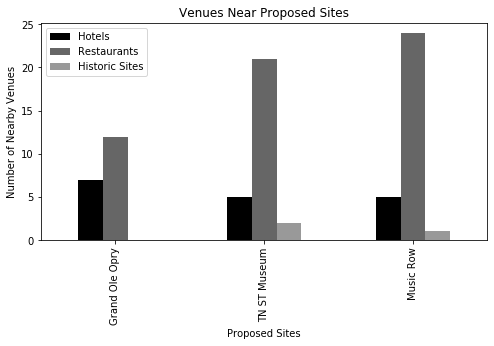

In [28]:
#Setting bar chart parameters to visualize results
nash_bar = nashville_sites.loc[['Grand Ole Opry', 'TN ST Museum', 'Music Row'],
                            ['Hotels', 'Restaurants', 'Historic Sites']]
nash_bar.plot(kind='bar', figsize=(8,4))

plt.xlabel('Proposed Sites')
plt.ylabel('Number of Nearby Venues')
plt.title('Venues Near Proposed Sites')

plt.show()

...AND MEMPHIS

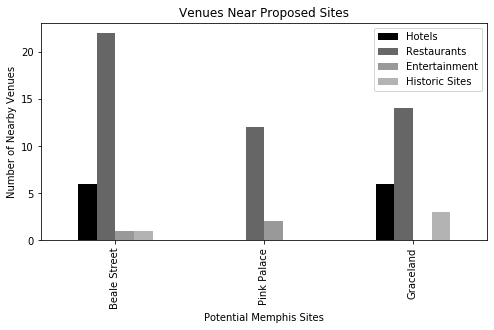

In [29]:
mem_bar = Memphis_Sites.loc[['Beale Street', 'Pink Palace', 'Graceland'],
                            ['Hotels', 'Restaurants', 
                             'Entertainment', 'Historic Sites']]
mem_bar.plot(kind='bar', figsize=(8,4))

plt.xlabel('Potential Memphis Sites')
plt.ylabel('Number of Nearby Venues')
plt.title('Venues Near Proposed Sites')

plt.show()

TOTALS FOR NASHVILLE

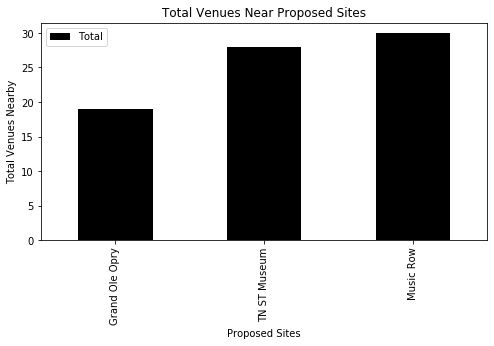

In [30]:
#Totals for projected sites in Nashville
nash_bar2 = nashville_sites.loc[['Grand Ole Opry', 'TN ST Museum', 'Music Row'],
                            ['Total']]
nash_bar2.plot(kind='bar', figsize=(8,4))

plt.xlabel('Proposed Sites')
plt.ylabel('Total Venues Nearby')
plt.title('Total Venues Near Proposed Sites')

plt.show()

TOTALS FOR MEMPHIS

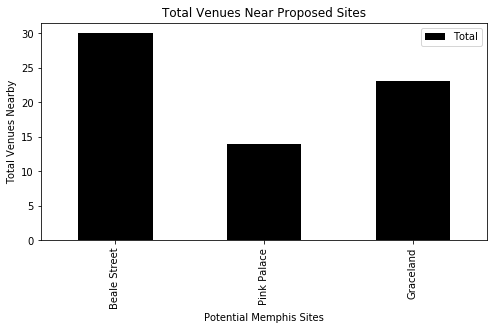

In [31]:
#Projected sites in Memphis
mem_bar2 = Memphis_Sites.loc[['Beale Street', 'Pink Palace', 'Graceland'],
                            ['Total']]
mem_bar2.plot(kind='bar', figsize=(8,4))

plt.xlabel('Potential Memphis Sites')
plt.ylabel('Total Venues Nearby')
plt.title('Total Venues Near Proposed Sites')

plt.show()

THE DATA SHOWS THAT NASHVILLE IS THE BEST CHOICE BETWEEN THE TWO. IT HAS TWO SITES WITH 28 OR MORE VENUES WHICH INTERSECT.
PLACING THE NEW ROCK AND ROLL HALL OF FAME EXHIBIT WITHIN THE INTERSECTION OF THESE PROPOSED SITES WOULD CREATE THE MOST
VALUE FOR THE CUSTOMERS. 

THIS NEW SITE NEAR THE TENNESSEE STATE CAPITOL WILL BE EXAMINED FOR ANY CRIME RELATED ISSUES TO ENSURE THE ATTENDEES ARE SAFE
AND NEGATIVE PUBLIC RELATIONS ISSUES ARE HELD TO A MINIMUM.

In [32]:
file = 'nash_crime.csv' # CSV crime data for exploration
nash_crime = pd.read_csv(file)

In [33]:
#Creating DF for non-resident incidents
tourist_crime = nash_crime[['Incident Location', 'ZIP', 'Location Description', 'Offense Description', 'Weapon Description', 'Victim County Resident', 'Latitude', 'Longitude']]

In [34]:
#Filtering and sorting Df columns 
tour_crime = tourist_crime[tourist_crime['Victim County Resident'].str.contains('RESIDENT')==False]
tour_crime = pd.DataFrame(tour_crime)

In [35]:
tour_vict = tour_crime.sort_values(by='Latitude', ascending = True)
tour_vict.reset_index(inplace=True)

In [36]:
tour_vict = tour_vict[(tour_vict['Longitude']<=-86.78) & (tour_vict['Longitude']>=-86.80)]

to_vi = pd.DataFrame(tour_vict.reset_index())

df_vict = to_vi.loc[76:252]

df_vic = pd.DataFrame(df_vict)

df_vic = df_vic.loc[df_vic['Location Description'].str.contains('PARKING LOT') | df_vic['Location Description'].str.contains('HOTEL') | df_vic['Location Description'].str.contains('BAR') |
                    df_vic['Location Description'].str.contains('ATM') | df_vic['Location Description'].str.contains('RESTAURANT')] 
                    
df_V = df_vic.loc[df_vic['Offense Description'].str.contains('BURGLARY') | df_vic['Offense Description'].str.contains('THEFT') | df_vic['Offense Description'].str.contains('ASSAULT')
                  | df_vic['Offense Description'].str.contains('FRAUD') | df_vic['Offense Description'].str.contains('LARC')]

df_V = pd.DataFrame(df_V)

In [44]:
#Dropping unneeded columns and grouping by coordinates 
df_L = df_V.groupby(['Latitude','Longitude']).count()
pd.DataFrame(df_L)
df_L.columns
del df_L['level_0']
del df_L['index']
del df_L['ZIP']
del df_L['Incident Location']
del df_L['Weapon Description']
del df_L['Victim County Resident']
df_L['Location Description'].sum()

35

In [38]:
#Adding markers for each incident of crime against tourists near locations
Location_Map1 = folium.Map(location = [36.1600, -86.7842], tiles = 'Stamen Toner', attr=None, zoom_start = 14.2)
folium.features.Circle([36.160, -86.7842], radius = 2000, color = 'black').add_to(Location_Map1)
folium.features.Circle([36.149, -86.796], radius = 25, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.155, -86.805], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.155, -86.805], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.155, -86.805], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.155, -86.805], radius = 70, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.150, -86.796], radius = 25, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.152, -86.791], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.152, -86.791], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.152, -86.791], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.152, -86.791], radius = 70, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.157, -86.787], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.157, -86.787], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.157, -86.787], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.157, -86.787], radius = 70, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.158, -86.783], radius = 25, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.800], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.800], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.800], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.164, -86.797], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.164, -86.797], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.164, -86.797], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.780], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.780], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.780], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.780], radius = 70, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.160, -86.780], radius = 90, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.175, -86.782], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.175, -86.782], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.175, -86.782], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.170, -86.795], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.170, -86.795], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.170, -86.795], radius = 50, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.170, -86.800], radius = 10, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.170, -86.800], radius = 30, color = 'red').add_to(Location_Map1)
folium.features.Circle([36.170, -86.800], radius = 50, color = 'red').add_to(Location_Map1)

In [39]:
#Resetting Foursquare results labels for winning location and comparing against crime labels
for lat, lng, label in zip(nash_2_hotels.lat, nash_2_hotels.lng, nash_2_hotels.categories):
    folium.features.CircleMarker([lat, lng],radius=5, color='orange', fill=True, fill_color='orange', fill_opacity=1).add_to(Location_Map1)
for lat, lng, label in zip(nash_2_rest.lat, nash_2_rest.lng, nash_2_rest.categories):
    folium.features.CircleMarker([lat, lng],radius=5, color='darkgreen', fill=True, fill_color='darkgreen', fill_opacity=1).add_to(Location_Map1)
for lat, lng, label in zip(nash_2_monu.lat, nash_2_monu.lng, nash_2_monu.categories):
    folium.features.CircleMarker([lat, lng],radius=5, color='purple', fill=True, fill_color='purple', fill_opacity=1).add_to(Location_Map1)
for lat, lng, label in zip(nash_3_hotels.lat, nash_3_hotels.lng, nash_3_hotels.categories):
    folium.features.CircleMarker([lat, lng],radius=5, color='orange', fill=True, fill_color='orange', fill_opacity=1).add_to(Location_Map1)
for lat, lng, label in zip(nash_3_rest.lat, nash_3_rest.lng, nash_3_rest.categories):
    folium.features.CircleMarker([lat, lng],radius=5, color='darkgreen', fill=True, fill_color='darkgreen', fill_opacity=1).add_to(Location_Map1)
for lat, lng, label in zip(nash_3_monu.lat, nash_3_monu.lng, nash_3_monu.categories):
    folium.features.CircleMarker([lat, lng], radius=5, color='purple', fill=True, fill_color='purple', fill_opacity=1).add_to(Location_Map1)   

In [40]:
Location_Map1 #Final map of winning locations nearby venues and crime incidents

THE RED TARGETS REPRESENT OCCURRENCES OF VARYING PROPERTY CRIMES OR ASSAULTS AGAINST NON-NASHVILLE RESIDENTS IN 2018.
THE RINGS OF EACH TARGET EQUAL A SINGLE OFFENSE. TARGETS WITH MULTIPLE RINGS ARE THE LOCATIONS WHERE CRIMES AGAINST 
TOURISTS ARE MOST LIKELY.

CONCLUSION: DEVELOPMENT OF THE NEW ROCK AND ROLL EXPLOREUM SHOULD TAKE PLACE SLIGHTLY TO THE NORTHEAST OF THE TENNESSEE STATE CAPITOL ALONG THE RIVERBANK.